<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:

# CSV dosyasını yükle
df = pd.read_csv('cleaned_survey_data_lab2.csv')

# İlk 5 satırı göster
print(df.head())

   Respondent                      MainBranch Hobbyist  \
0           4  I am a developer by profession       No   
1           9  I am a developer by profession      Yes   
2          13  I am a developer by profession      Yes   
3          16  I am a developer by profession      Yes   
4          17  I am a developer by profession      Yes   

                                         OpenSourcer  \
0                                              Never   
1                         Once a month or more often   
2  Less than once a month but more than once per ...   
3                                              Never   
4  Less than once a month but more than once per ...   

                                          OpenSource          Employment  \
0  The quality of OSS and closed source software ...  Employed full-time   
1  The quality of OSS and closed source software ...  Employed full-time   
2  OSS is, on average, of HIGHER quality than pro...  Employed full-time   
3  The qua

<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


/tmp/ipykernel_2359/588862146.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DevType'].fillna('Unknown', inplace=True)


AttributeError: module 'matplotlib.pyplot' has no attribute 'legend_'

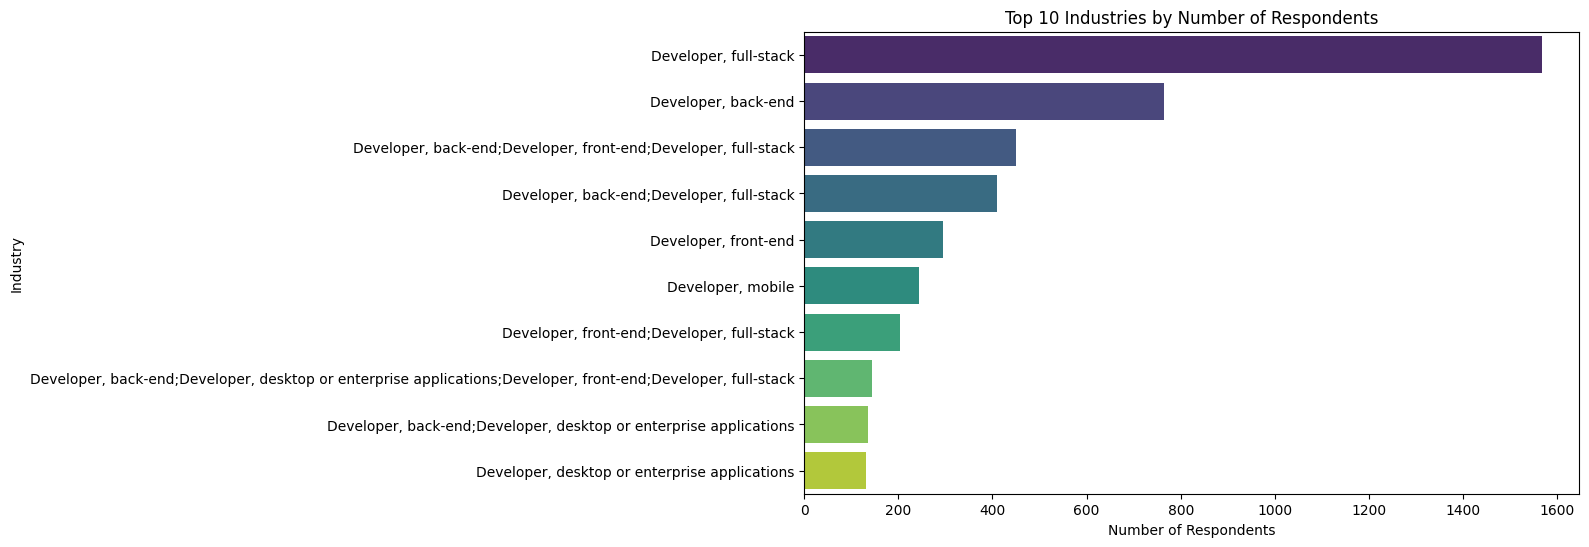

In [11]:

# Eksik değerleri 'Unknown' ile doldur
df['DevType'].fillna('Unknown', inplace=True)

# DevType bazında sayım yap
industry_counts = df['DevType'].value_counts()

# En sık 10 sektörü al
top10_industries = industry_counts.head(10).reset_index()
top10_industries.columns = ['DevType', 'Count']

# Her bar için farklı renk kullanmak için dummy hue ekle
top10_industries['hue'] = top10_industries['DevType']

# Bar plot
plt.figure(figsize=(10,6))
sns.barplot(data=top10_industries, y='DevType', x='Count', hue='hue', dodge=False, palette='viridis')
plt.xlabel('Number of Respondents')
plt.ylabel('Industry')
plt.title('Top 10 Industries by Number of Respondents')
plt.legend_.remove()  # legend'i kaldır
plt.tight_layout()
plt.show()


<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [12]:
# Temel istatistikleri hesapla
mean_comp = df['ConvertedComp'].mean()
median_comp = df['ConvertedComp'].median()
std_comp = df['ConvertedComp'].std()

print(f"Mean: {mean_comp:.2f}")
print(f"Median: {median_comp:.2f}")
print(f"Standard Deviation: {std_comp:.2f}")

# Uç değer eşiğini belirle (3 standart sapma üstü)
threshold = mean_comp + 3 * std_comp
print(f"Outlier Threshold: {threshold:.2f}")

# Uç değerleri bul
high_comp_outliers = df[df['ConvertedComp'] > threshold]
print(f"Number of high compensation outliers: {len(high_comp_outliers)}")
high_comp_outliers[['Respondent', 'ConvertedComp']].head(10)


Mean: 126097.59
Median: 57744.00
Standard Deviation: 284289.06
Outlier Threshold: 978964.76
Number of high compensation outliers: 357


,Respondent,ConvertedComp
13,32,1100000.0
46,102,2000000.0
60,128,1000000.0
76,166,2000000.0
123,273,1000000.0
203,436,2000000.0
210,452,2000000.0
237,539,2000000.0
264,589,1750000.0
358,770,2000000.0


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


Number of outliers: 945


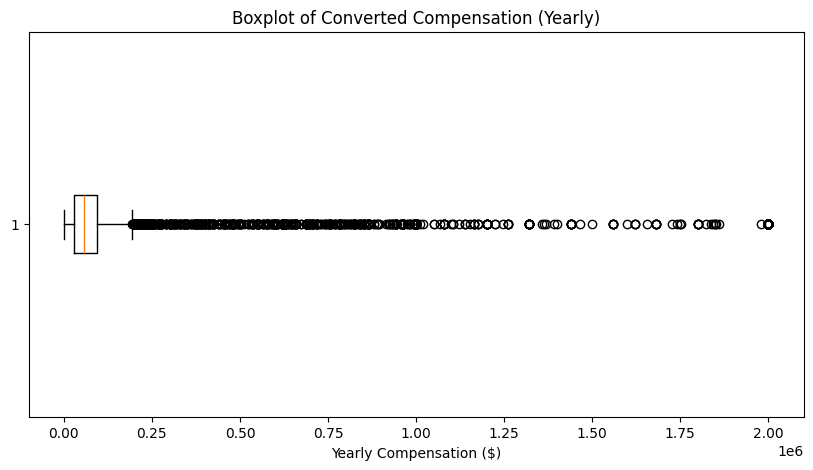

In [13]:
import matplotlib.pyplot as plt

# ConvertedCompYearly sütununu seç
comp = df['ConvertedComp']

# 1. Çeyrekleri hesapla
Q1 = comp.quantile(0.25)
Q3 = comp.quantile(0.75)
IQR = Q3 - Q1

# 2. Alt ve üst sınırları belirle
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 3. Uç değerleri tespit et
outliers = comp[(comp < lower_bound) | (comp > upper_bound)]
print(f"Number of outliers: {len(outliers)}")

# 4. Boxplot ile görselleştir
plt.figure(figsize=(10,5))
plt.boxplot(comp, vert=False)
plt.title('Boxplot of Converted Compensation (Yearly)')
plt.xlabel('Yearly Compensation ($)')
plt.show()


<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [14]:
# Alt ve üst sınırlar Step 4'ten alınmalı
# lower_bound, upper_bound

# Uç değerleri çıkar ve yeni DataFrame oluştur
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Yeni DataFrame boyutunu kontrol et
print(f"Original DataFrame size: {df.shape}")
print(f"DataFrame size after removing outliers: {df_no_outliers.shape}")


Original DataFrame size: (11552, 83)
DataFrame size after removing outliers: (10607, 83)


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [ ]:
##Write your code here

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
